In [4]:
using AutomotiveDrivingModels
using AutoViz
using Interact

In [7]:
seed = 6
input_filepath = "../../data/trajdatas/$(seed).txt"
veh_filepath = "../../data/trajdatas/seeds_veh_idxs.csv"
infile = open(input_filepath, "r")
trajdata = read(infile, Trajdata);
veh_idxs = readtable(veh_filepath)
veh_idxs = veh_idxs[veh_idxs[:seed] .== seed, :][:vehicle_index]
roadway = gen_stadium_roadway(5, length=400., radius=100.);

Interact.Options{:SelectionSlider,Int64}(Signal{Int64}(75, nactions=1),"frame",75,"75",Interact.OptionDict(DataStructures.OrderedDict("1"=>1,"2"=>2,"3"=>3,"4"=>4,"5"=>5,"6"=>6,"7"=>7,"8"=>8,"9"=>9,"10"=>10…),Dict(68=>"68",148=>"148",124=>"124",2=>"2",89=>"89",11=>"11",39=>"39",46=>"46",85=>"85",134=>"134"…)),Any[],Any[],true,"horizontal")

Interact.Options{:ToggleButtons,Int64}(Signal{Int64}(9, nactions=1),"veh_idx",9,"9",Interact.OptionDict(DataStructures.OrderedDict("9"=>9,"18"=>18,"81"=>81,"96"=>96,"121"=>121,"133"=>133,"184"=>184,"187"=>187),Dict(9=>"9",133=>"133",187=>"187",121=>"121",81=>"81",184=>"184",96=>"96",18=>"18")),Any[],Any[],true,"horizontal")

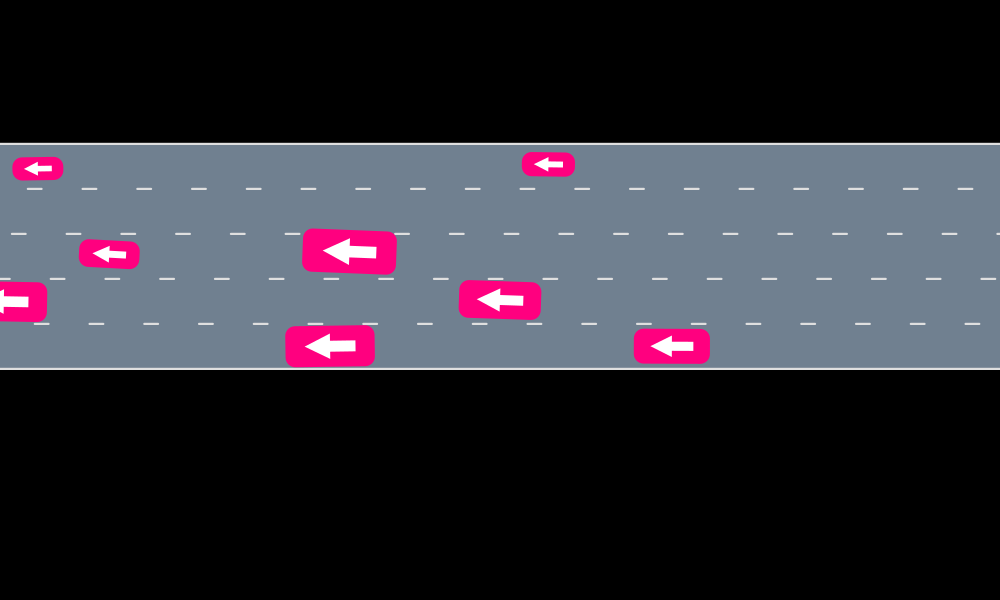

In [8]:
scene = Scene()
@manipulate for frame in 1:nframes(trajdata),
                veh_idx in veh_idxs
    render(get!(scene, trajdata, frame), roadway, cam = CarFollowCamera(veh_idx, 15.))
end